In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Activation Functions


![test](https://www.i2tutorials.com/wp-content/uploads/2019/09/Deep-learning-25-i2tutorials.png)



In [2]:
def relu(z, deriv=False):
    activations = []
    shape = z.shape
    z = z.flatten()
    if deriv:
        for i in range(len(z)):
            if z[i] >= 0:
                activations.append(1)
            else:
                activations.append(-0.2)
        return np.array(activations).reshape(shape)
    for i in range(len(z)):
        if z[i] > 0:
            activations.append(z[i])
        else:
            activations.append(-0.2 * z[i])
    return np.array(activations).reshape(shape)

# Weight & Bias Initialization

Bias Values ($b$) are initialized with $0$.  
Weight Values ($w$) are initialized with random values between $-2$ and $2$.

In [3]:
def initialize(min=0, max=1, do_print=True):
    global w, b
    w = [
            max * np.random.uniform(min, max, (2, 3)),
            max * np.random.uniform(min, max, (3, 3)),
            max * np.random.uniform(min, max, (3, 2)),
            max * np.random.uniform(min, max, (2, 1))
        ]
    b = [
        np.array(np.zeros(3)),
        np.array(np.zeros(3)),
        np.array(np.zeros(2)),
        np.array(np.zeros(1))
    ]
    if do_print:
        for i in range(len(b)): print(f'Layer {i}:\nWeights:\n {w[i]}\nBias: \n{b[i]}\n')    

w, b = [], []

initialize()



Layer 0:
Weights:
 [[0.99518784 0.06625664 0.9412545 ]
 [0.60178277 0.41101902 0.46634165]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[0.36098652 0.5992778  0.61344756]
 [0.36672786 0.16745812 0.93395789]
 [0.23537374 0.60426969 0.28901035]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[0.36353909 0.27046865]
 [0.10499192 0.92876376]
 [0.42341423 0.54617965]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.32089119]
 [0.55326808]]
Bias: 
[0.]



# Forward Propagation
$a$ holds each layers activation vector.  
$z$ holds each layers pre nonlinearity vector.

## Algorithm

For each layer $L$, starting with $L_0$ we multiply the $h$ vector with the weight matrix $w$.

$$
w = \left[ \begin{array}{rrr}
1.3 & 0.2 \\                                              
0.1 & 1.4 \\
1.2 & 0 \\
\end{array}\right] \ \ \ \ \ \ \ 
h = \left( \begin{array}{rrr}
1.3 \\                                              
0.1 \\
1.2 \\
\end{array}\right)
$$

In [4]:
a, z = [], []

initialize()

def forward_prop(X):
    h = X
    global a, z
    a,z  = [], []
    for i in range(len(w)):
        h = h @ w[i] # weigt * input
        h = h + b[i] # bias add
        z.append(h)
        h = relu(h) # Activation Function
        a.append(h)
    return h

forward_prop(np.array([0,1]))

Layer 0:
Weights:
 [[0.32536823 0.04899932 0.14864151]
 [0.94075787 0.7074265  0.56261487]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[0.67694373 0.74869839 0.70778102]
 [0.85755744 0.17796351 0.2490161 ]
 [0.26323755 0.52519175 0.26837595]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[0.96743212 0.05189514]
 [0.03399553 0.46182972]
 [0.44693799 0.64360076]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.9138108 ]
 [0.17136098]]
Bias: 
[0.]



array([1.88175523])

# Back Prop

for each layer

$g = loss'(X,y)$

## Step 1 ($a$ to $z$)

$g = relu'(z)$



## Step 2 ($z$ to $W$)

$g = relu'(z) * a_{L-1}$

# Dimensions

$g = [1\times2]$

## Step 1 Activation Function Derriv

$g = [1\times2]$


In [49]:
learning_rate = 0.05

initialize(do_print=False)

def back_prop(X, y, print_loss=False):
    global a, z, w, b

    g = (X - y).reshape(1,-1).T
    loss = 0.5*(y - X)**2
    
    if print_loss:
        print("Loss: ", (y - X)**2)
    
    n_weights, n_bias = [], []
    
    for x in range(len(w)):
        i = len(b) - 1 - x  # Reverse Index

        # Activation Function Derrivative [1xn]
        g = g * relu(z[i], True)  # Activation Function Derriv
        
        # Derivative with respect to weight [1xn]  
        if i-1 < 0: w_der = y.reshape(1,-1).T
        else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation
        
        
#         print(w_der.shape, g.shape)
#         print((w_der @ g).shape)
        
        # Change in Weights
        new_weights = w[i] - learning_rate * (w_der @ g)
        n_weights.append(new_weights)
        
        new_bias = b[i] - learning_rate * g
        n_bias.append(new_bias)
        
        g = g @ w[i].T 
    
    n_weights = list(reversed(n_weights))
    n_bias = list(reversed(n_bias))
    w = n_weights
    b = n_bias
    
    return loss
    

X = forward_prop(np.array([0,1]))
print(X)
back_prop(X, np.array([1]))

[0.521]


array([0.115])

In [48]:
from random import randint

def train(epochs, size=100):
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,1)
            y2 = randint(0,1)
            tmp += back_prop(forward_prop(np.array([y1,y2])), np.array([y1+y2]))[0]
        print("Loss: ", tmp/size)

initialize(do_print=False)
train(20, 100)
print(forward_prop(np.array([0.2,0.3])))
print(forward_prop(np.array([0.7,0.2])))
print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([1,1])))

Loss:  [0.027]
Loss:  [0.013]
Loss:  [0.008]
Loss:  [0.005]
Loss:  [0.003]
Loss:  [0.002]
Loss:  [0.001]
Loss:  [0.001]
Loss:  [0.]
Loss:  [0.]
Loss:  [0.]
Loss:  [7.71e-05]
Loss:  [4.067e-05]
Loss:  [2.535e-05]
Loss:  [1.439e-05]
Loss:  [1.011e-05]
Loss:  [4.304e-06]
Loss:  [2.405e-06]
Loss:  [1.183e-06]
Loss:  [6.362e-07]
[[0.5]]
[[0.899]]
[[0.998]]
[[1.999]]


## Learning XOR

Layer 0:
Weights:
 [[ 0.45263652 -0.36990386 -0.35335585]
 [ 0.58963526 -0.56347703  0.10687987]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[ 0.93097644  0.51729997  0.996151  ]
 [-0.44854811 -0.11189472 -0.207422  ]
 [-0.1513764  -0.59704283  0.5785767 ]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[ 0.56381598 -0.7113131 ]
 [-0.92314748  0.70076371]
 [-0.95961147  0.47062027]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[-0.01605429]
 [-0.04958998]]
Bias: 
[0.]

Loss:  [0.14418422]
Loss:  [0.05672511]
Loss:  [0.00667237]
Loss:  [0.0009283]
Loss:  [0.00010258]
Loss:  [1.73457745e-05]
Loss:  [5.37101084e-06]
Loss:  [2.00479364e-06]
Loss:  [8.07286043e-07]
Loss:  [2.7726979e-07]
[[0.99988251]]
[[1.00007788]]
[[0.00108673]]
[[7.22759909e-05]]


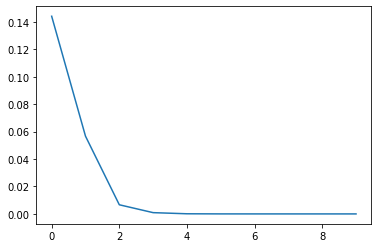

In [7]:
X = [
    [0,1],
    [0,0],
    [1,0],
    [1,1]
]

y = [1,0,1,0]

initialize(-1, 1)

def train(epochs, size=100):
    l = []
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,3)
            tmp += back_prop(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(tmp/size)
        print("Loss: ", tmp/size)
    return np.array(l).flatten()

loss_over_time =  train(10,1000)

print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([0,1])))
print(forward_prop(np.array([0,0])))
print(forward_prop(np.array([1,1])))

plt.plot(loss_over_time)

In [44]:
forward_prop(np.array(X))

array([[9.986e-01],
       [2.410e-05],
       [1.001e+00],
       [4.559e-06]])

In [45]:
initialize()

Layer 0:
Weights:
 [[0.771 0.729 0.373]
 [0.272 0.665 0.537]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[0.918 0.839 0.013]
 [0.298 0.202 0.563]
 [0.63  0.771 0.68 ]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[0.142 0.176]
 [0.327 0.907]
 [0.705 0.31 ]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.514]
 [0.613]]
Bias: 
[0.]



# Recursive Backpropagation Implementation
Exmaple: Learning XOR

In [47]:
np.set_printoptions(precision=3)


def backprop_entry(X, y, print_loss=False):
    global a, z, w, b, n_weights, n_bias
    n_weights, n_bias = [], []
    
    backprop_rec(0, X, y)
    
    # Update Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    return 0.5*(y - X)**2  # Return Loss


def backprop_rec(i, X, y):
    global a, z, w, b, n_weights, n_bias

    # Base Case
    if i+1 > len(w): return (X - y).reshape(1,-1).T
    
    g = backprop_rec(i+1, X, y) * relu(z[i], True)  # Get Next Layer Derivative
    
    # Derivative with respect to weight [1xn]  
    if i-1 < 0: w_der = y.reshape(1,-1).T  # Input Matrix
    else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation

    # Save change in weights
    n_weights.append(w[i] - learning_rate * (w_der @ g))
    n_bias.append(b[i] - learning_rate * g)
    
    return g @ w[i].T 

def train_rec(epochs, size=100, threshold=0.0001):
    l = []
    for i in range(epochs):
        sum_loss = 0.0
        for x in range(size):
            y1 = randint(0,3)
            
            sum_loss += backprop_entry(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(sum_loss/size)
        print(f'[Epoch {i}] Loss: {l[-1]}')
        if l[-1] < threshold: break
    return np.array(l).flatten()

initialize(-1, 1, do_print=False)

loss_over_time = train_rec(200,1000)
print(forward_prop(np.array([[1,0], [1,0], [1,1], [0,0]])))

[Epoch 0] Loss: [0.04]
[Epoch 1] Loss: [0.088]
[Epoch 2] Loss: [0.067]
[Epoch 3] Loss: [0.068]
[Epoch 4] Loss: [0.064]
[Epoch 5] Loss: [0.061]
[Epoch 6] Loss: [0.046]
[Epoch 7] Loss: [0.106]
[Epoch 8] Loss: [0.109]
[Epoch 9] Loss: [0.011]
[Epoch 10] Loss: [0.01]
[Epoch 11] Loss: [5.968e-13]
[[1.000e+00]
 [1.000e+00]
 [8.100e-12]
 [5.347e-14]]
